In [1]:
%load_ext autoreload
%autoreload 2

# Example Notebook - Example Projection of Emotion

TODO

In [2]:
import face_projection as fp
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
face_image = Image.open('data/stable_diffusion_angry.png').convert('RGB')
face_data  = Image.open('data/powermap_angry.png').convert('RGB')
face_data = face_data.resize((1024, 1024))

In [5]:
face_image = np.array(face_image)
face_data  = np.array(face_data)

In [6]:
warper = fp.Warper()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [7]:
projected = warper.apply(face_image, face_data, beta=0.5)

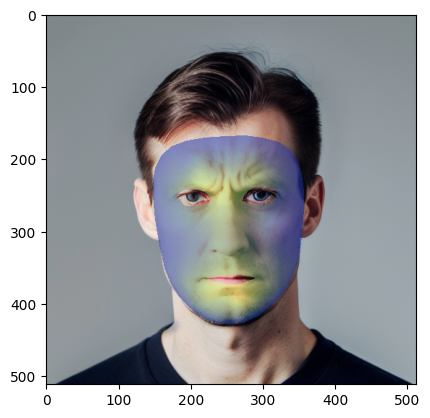

In [8]:
plt.imshow(projected)

## Show the sample warpings without faces

In [33]:
emotions_face = {
    "neutral"   : np.asarray(Image.open('data/stable_diffusion_neutral.png').convert('RGB')),
    "angry"     : np.asarray(Image.open('data/stable_diffusion_angry.png').convert('RGB')),
    "happy"     : np.asarray(Image.open('data/stable_diffusion_happy.png').convert('RGB')),
    "sad"       : np.asarray(Image.open('data/stable_diffusion_sad.png').convert('RGB')),
    "fearful"   : np.asarray(Image.open('data/stable_diffusion_fearful.png').convert('RGB')),
    "disgusted" : np.asarray(Image.open('data/stable_diffusion_disgusted.png').convert('RGB')),
    "surprised" : np.asarray(Image.open('data/stable_diffusion_surprised.png').convert('RGB')),
}
emotions_data = {
    "neutral"   : np.asarray(Image.open('data/powermap_neutral.png').convert('RGB')),
    "angry"     : np.asarray(Image.open('data/powermap_angry.png').convert('RGB')),
    "happy"     : np.asarray(Image.open('data/powermap_happy.png').convert('RGB')),
    "sad"       : np.asarray(Image.open('data/powermap_sad.png').convert('RGB')),
    "fearful"   : np.asarray(Image.open('data/powermap_fearful.png').convert('RGB')),
    "disgusted" : np.asarray(Image.open('data/powermap_disgusted.png').convert('RGB')),
    "surprised" : np.asarray(Image.open('data/powermap_surprised.png').convert('RGB')),
}

In [44]:
warper = fp.Warper()

projected_emotion = {}
for emotion in emotions_face:
    projected_emotion[emotion] = warper.apply(emotions_face[emotion], emotions_data[emotion], beta=0.5)

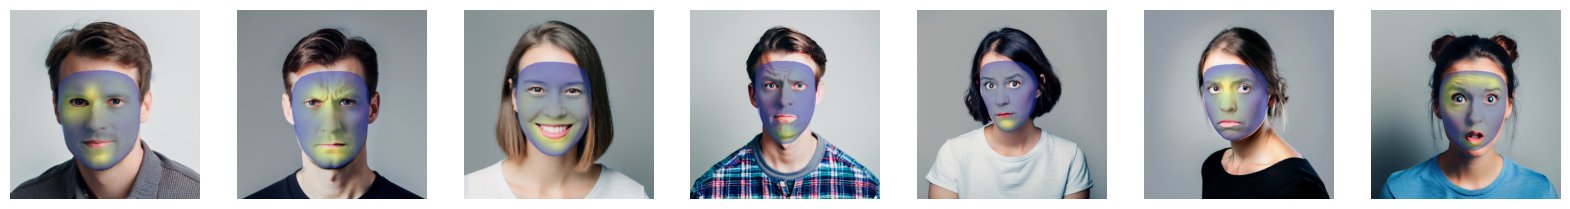

In [45]:
fig, ax = plt.subplots(1, 7, figsize=(20, 5))

for a, mov in zip(ax, projected_emotion):
    a.axis("off")
    a.imshow(projected_emotion[mov])
    
plt.savefig("../files/emotion.jpg", bbox_inches='tight', dpi=100)

In [46]:
# store the landmarks for later usage
# import h5py

# landmarks = {}

# for mov in emotions_face:
#     landmarks[mov] = warper.get_landmarks(emotions_face[mov]).astype(np.int32)
# file = h5py.File("../src/face_projection/emotion_landmarks.h5", "w")
# for mov in landmarks:
#     file.create_dataset(mov, data=landmarks[mov])
# file.close()

## Warp without faces

In [55]:
warper = fp.Warper()

projected_emotion = {}
for emotion in emotions_face:
    projected_emotion[emotion] = warper.emotion(emotion, emotions_data[emotion], beta=1.0)

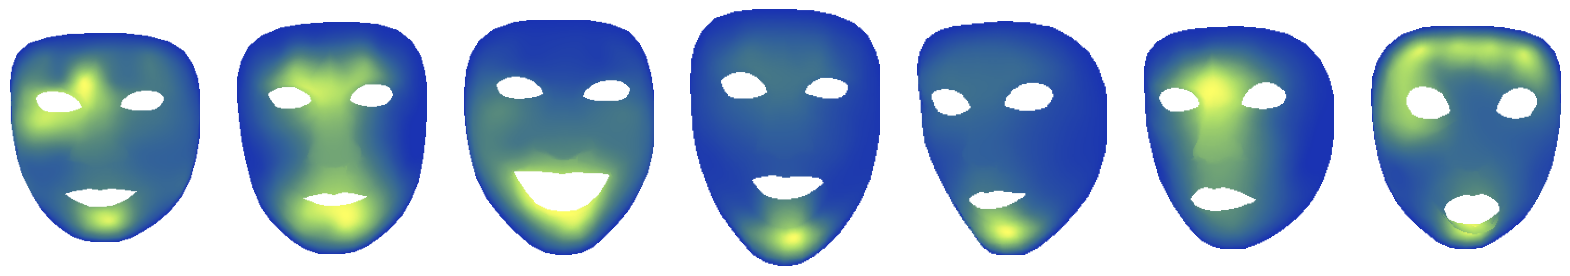

In [56]:
fig, ax = plt.subplots(1, 7, figsize=(20, 5))

for a, mov in zip(ax, projected_emotion):
    a.axis("off")
    a.imshow(projected_emotion[mov])
    
# plt.savefig("../files/emotion.jpg", bbox_inches='tight', dpi=100)